In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("tataSteel.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2468 non-null   object 
 1   Price     2468 non-null   float64
 2   Open      2468 non-null   float64
 3   High      2468 non-null   float64
 4   Low       2468 non-null   float64
 5   Vol.      2468 non-null   object 
 6   Change %  2468 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.set_index('Date')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2024-03-22 to 2014-04-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2468 non-null   float64
 1   Open      2468 non-null   float64
 2   High      2468 non-null   float64
 3   Low       2468 non-null   float64
 4   Vol.      2468 non-null   object 
 5   Change %  2468 non-null   object 
dtypes: float64(4), object(2)
memory usage: 135.0+ KB


In [8]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [9]:
df.index

DatetimeIndex(['2024-03-22', '2024-03-21', '2024-03-20', '2024-03-19',
               '2024-03-18', '2024-03-15', '2024-03-14', '2024-03-13',
               '2024-03-12', '2024-03-11',
               ...
               '2014-04-16', '2014-04-15', '2014-04-11', '2014-04-10',
               '2014-04-09', '2014-04-07', '2014-04-04', '2014-04-03',
               '2014-04-02', '2014-04-01'],
              dtype='datetime64[ns]', name='Date', length=2468, freq=None)

In [10]:
steel_prices = df.loc[:,'Price']
steel_prices.head()

Date
2024-03-22    151.50
2024-03-21    150.15
2024-03-20    145.70
2024-03-19    148.65
2024-03-18    149.60
Name: Price, dtype: float64

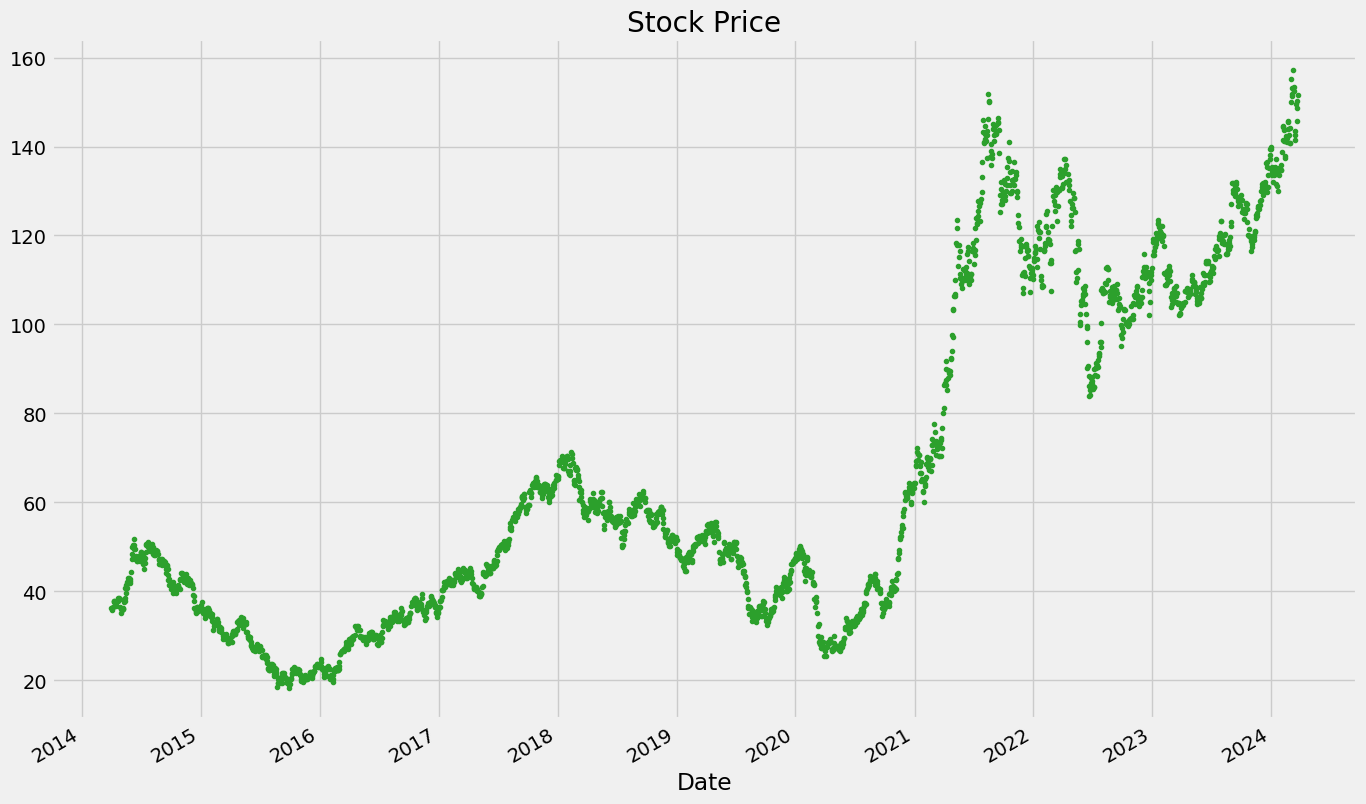

In [11]:
steel_prices.plot(
    style='.',
    figsize=(15,10),
    color= col_pal[2],
    title='Stock Price'
)
plt.show()

In [12]:
allTimeHigh = pd.Series(steel_prices)
maxPrice = allTimeHigh.max()

dateOfallTimeHigh = allTimeHigh.loc[allTimeHigh == maxPrice]
dateOfallTimeHigh

Date
2024-03-07    157.15
Name: Price, dtype: float64

In [13]:
allTimeLow = pd.Series(steel_prices)
minPrice = allTimeLow.min()

dateOfallTimeLow = allTimeLow.loc[allTimeLow == minPrice]
dateOfallTimeLow

Date
2015-09-29    18.12
Name: Price, dtype: float64

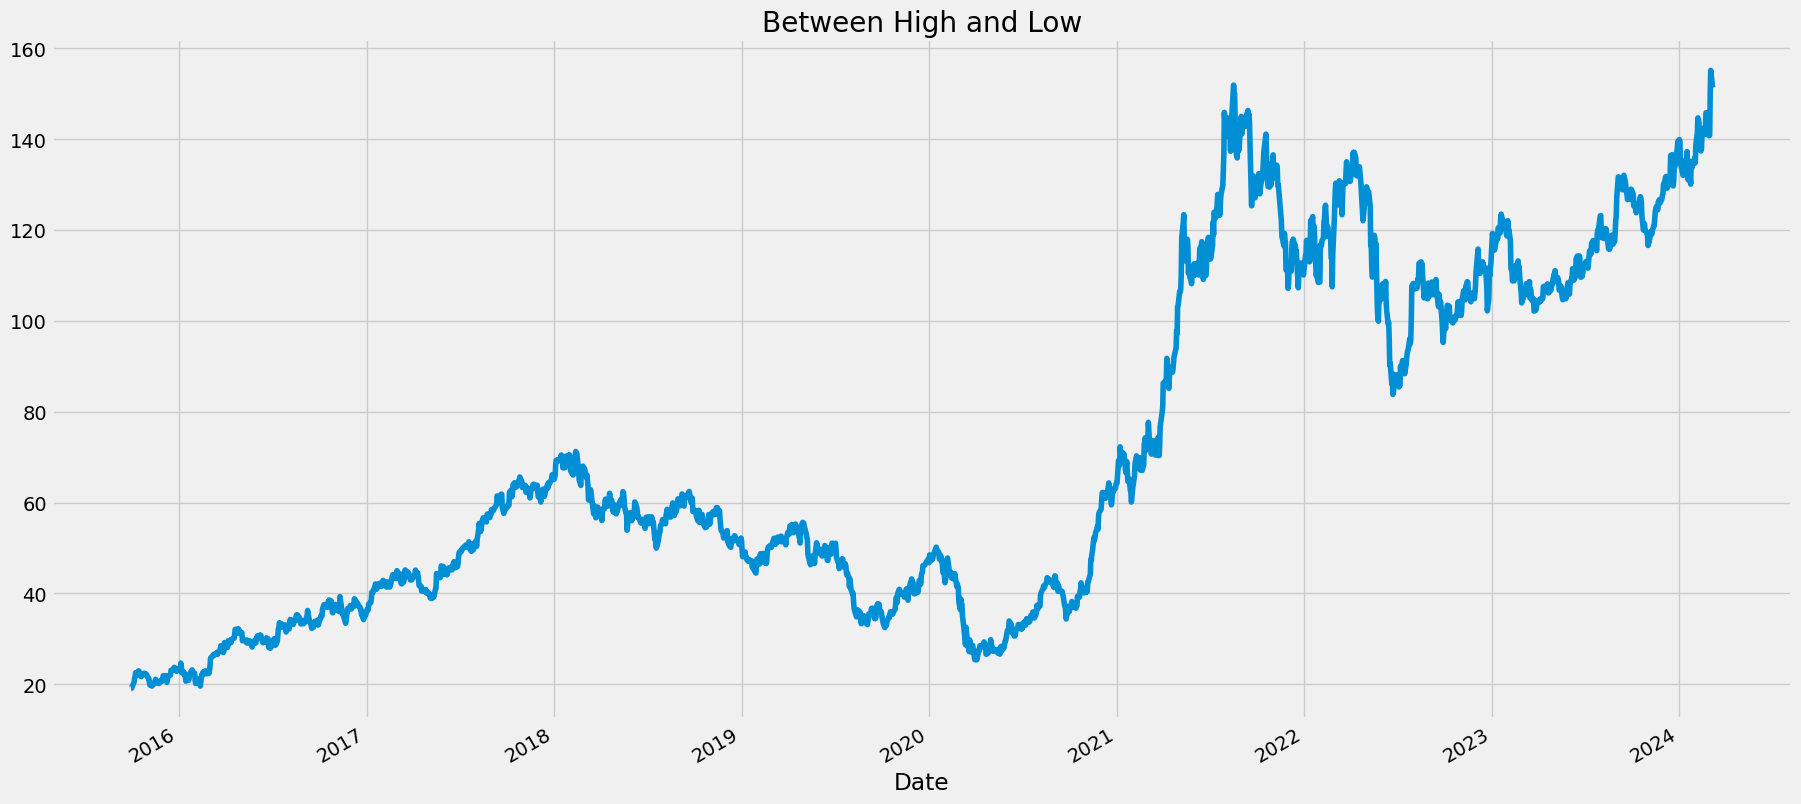

In [14]:
start_date = pd.to_datetime('2015-09-29')
end_date = pd.to_datetime('2024-03-07')

steel_prices.loc[(steel_prices.index > start_date) & (steel_prices.index < end_date)].plot(figsize=(20,10), title='Between High and Low')
plt.show()

In [15]:
stll = steel_prices.reset_index()

In [16]:
stll.head()

,Date,Price
0,2024-03-22,151.50
1,2024-03-21,150.15
2,2024-03-20,145.70
3,2024-03-19,148.65
4,2024-03-18,149.60


<Axes: ylabel='Frequency'>

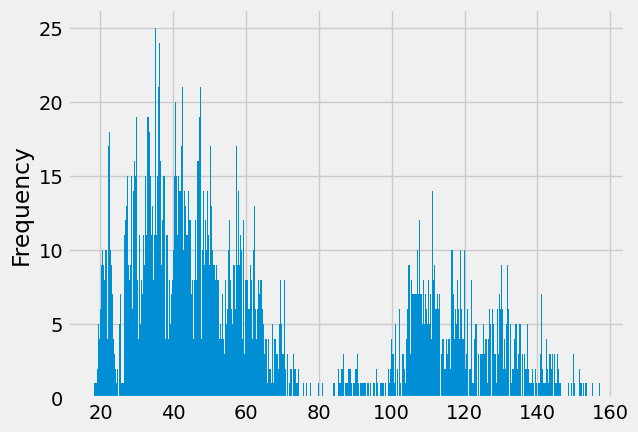

In [17]:
stll['Price'].plot(kind='hist',bins=500)

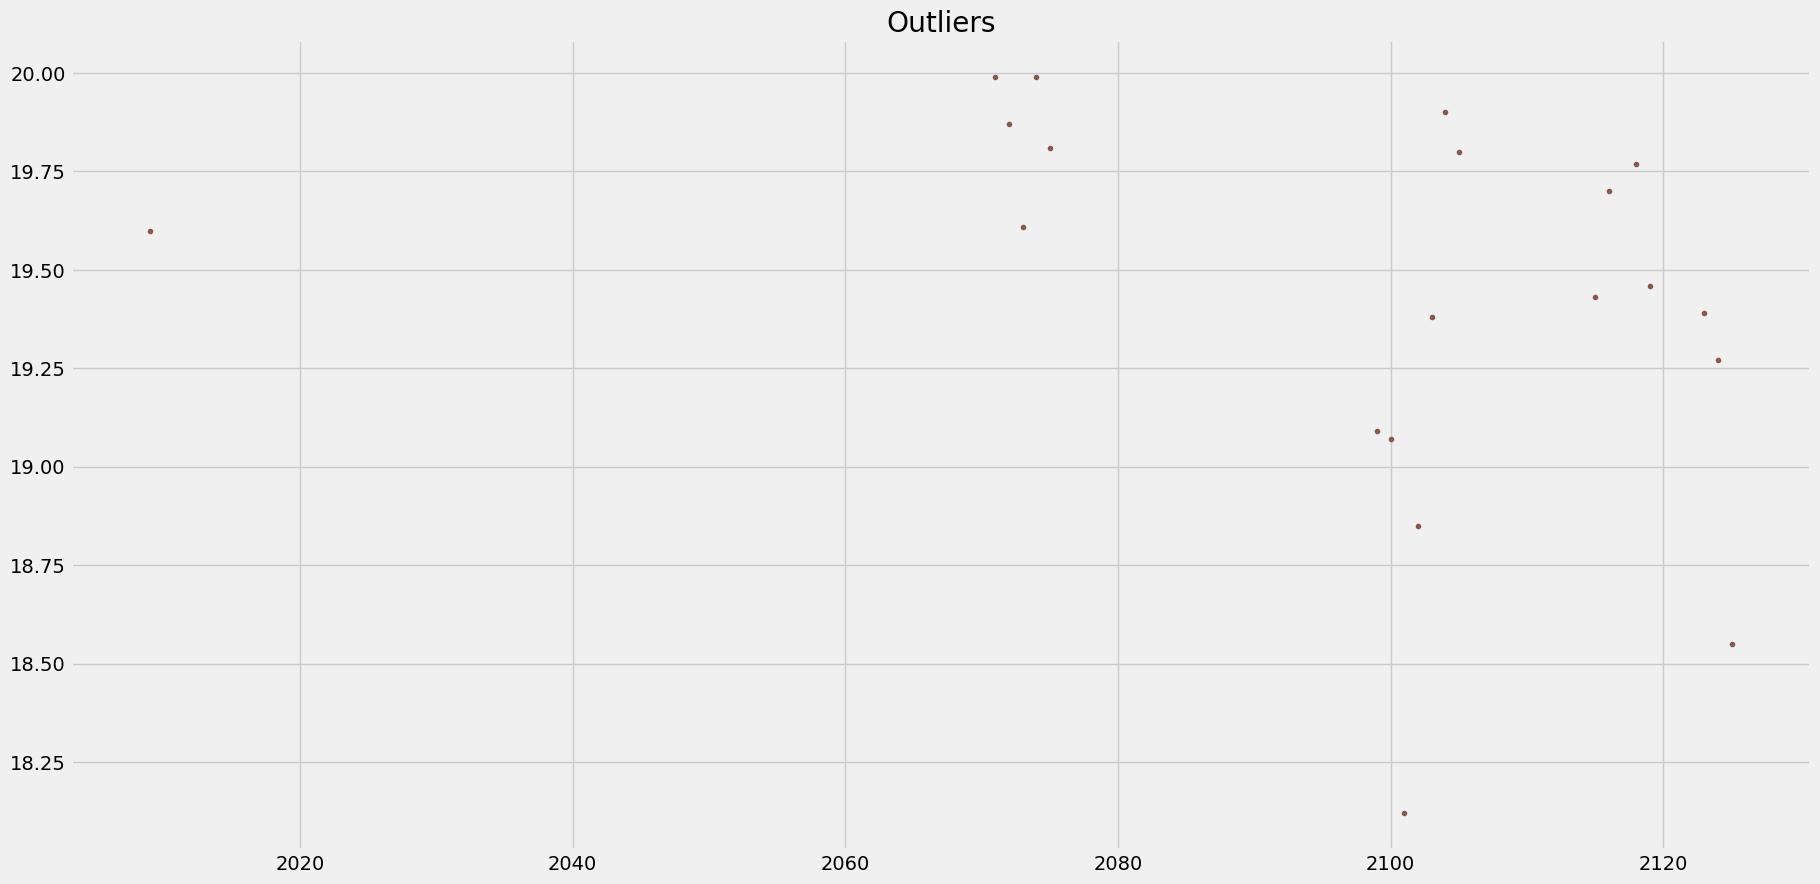

In [18]:
stll.query('Price < 20')['Price'].plot(style ='.',figsize=(20,10),color= col_pal[5],title='Outliers')
plt.show()

In [19]:
lessthan20 = stll.loc[:,'Price'] < 20
lessthan20.value_counts()

Price
False    2448
True       20
Name: count, dtype: int64

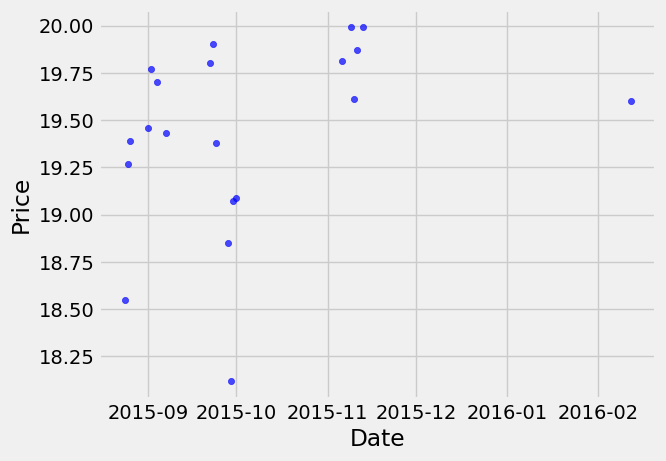

In [20]:
lessthanTwenty = stll.loc[stll['Price']< 20]
lessthanTwenty.plot.scatter(x='Date',y='Price', c='blue', alpha=0.7)
plt.grid(True)
plt.show()

In [21]:
def feature_create(df):
    df = df.copy()
    df['Month'] = df['Date'].dt.month
    df['DayofWeek'] = df['Date'].dt.dayofweek
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Year'] = df['Date'].dt.year
    df['Quarter'] = df['Date'].dt.quarter
    return df

stll_df = feature_create(stll)
stll_df.head()

,Date,Price,Month,DayofWeek,Week,Year,Quarter
0,2024-03-22,151.50,3,4,12,2024,1
1,2024-03-21,150.15,3,3,12,2024,1
2,2024-03-20,145.70,3,2,12,2024,1
3,2024-03-19,148.65,3,1,12,2024,1
4,2024-03-18,149.60,3,0,12,2024,1


In [22]:
spec_cols = ['Month','DayofWeek','Week','Year','Quarter']
correlations = {}
for col in spec_cols:
    correl = stll_df['Price'].corr(stll_df[col])
    # print(f'The correlation between Price and {col} is {correl}')
    correlations[col] = correl

print("Correlations between Price and other columns:")
for col, correlation in correlations.items():
    print(f"\t- {col}: {correlation:.2f}")  

Correlations between Price and other columns:
	- Month: -0.01
	- DayofWeek: 0.00
	- Week: -0.02
	- Year: 0.81
	- Quarter: -0.02


In [23]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-03-22,151.50,148.05,152.75,148.60,4.67M,0.90%
2024-03-21,150.15,148.05,151.15,147.90,5.50M,3.05%
2024-03-20,145.70,149.70,150.70,143.85,4.00M,-1.98%
2024-03-19,148.65,149.55,152.55,147.55,5.11M,-0.64%
2024-03-18,149.60,143.85,150.25,142.20,5.05M,5.69%


In [24]:
steel_copy = df.copy()

In [25]:
steel_copy.drop(["Vol.","Change %"], axis = 1, inplace = True)

In [26]:
steel_copy.head()

,Price,Open,High,Low
Date,,,,
2024-03-22,151.50,148.05,152.75,148.60
2024-03-21,150.15,148.05,151.15,147.90
2024-03-20,145.70,149.70,150.70,143.85
2024-03-19,148.65,149.55,152.55,147.55
2024-03-18,149.60,143.85,150.25,142.20


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import ElasticNet

In [50]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [52]:
model = LinearRegression()

In [53]:
print(X.head())

              Open    High     Low
Date                              
2024-03-22  148.05  152.75  148.60
2024-03-21  148.05  151.15  147.90
2024-03-20  149.70  150.70  143.85
2024-03-19  149.55  152.55  147.55
2024-03-18  143.85  150.25  142.20


In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
predictions = model.predict(X_test)

In [56]:
print(predictions)

[123.08322456  21.65008473 125.92504145  48.47176982  27.92674217
  43.87476165  70.44479542 129.1798592   32.50403497  41.58327895
  60.65104684 108.83540311  42.66840797  48.28478206  35.99498417
  32.64185593  21.50969939  33.92199906  33.03015649  58.19316255
  50.88941384  67.49069235  58.04723666  35.07110516  21.12495526
  55.34435537  90.14210399  32.88037906 108.7077532   46.5858408
 107.23552727  50.72128118  22.07831201  45.67690586  37.4954309
  42.18927994 107.34683325 129.93036931  29.11357186 151.73158058
 111.24625218  43.6235759   45.92417127  41.69899347  85.49294154
  41.73372568  34.00074642 111.2761386  110.5015243   65.4261436
  50.32819477  38.13011662 130.83799445 110.75426413 113.22375186
 112.71522936 111.00775881  29.08247874 129.56469045  55.61569356
  37.2881302   43.24057806 106.51650573 149.91664619  59.48273427
 104.4703175  125.41076145  33.94638816  26.15009256 126.1297811
  97.56156597  35.49774293 105.26977683  23.1337722   35.89984443
  70.61112707 

In [57]:
model.score(X_test,y_test)

0.999808490532006

In [58]:
X = df[['Price']] 
y = df['Price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [61]:
y_pred = model.predict(X_test)

In [62]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 1.0000
Mean Squared Error: 0.00


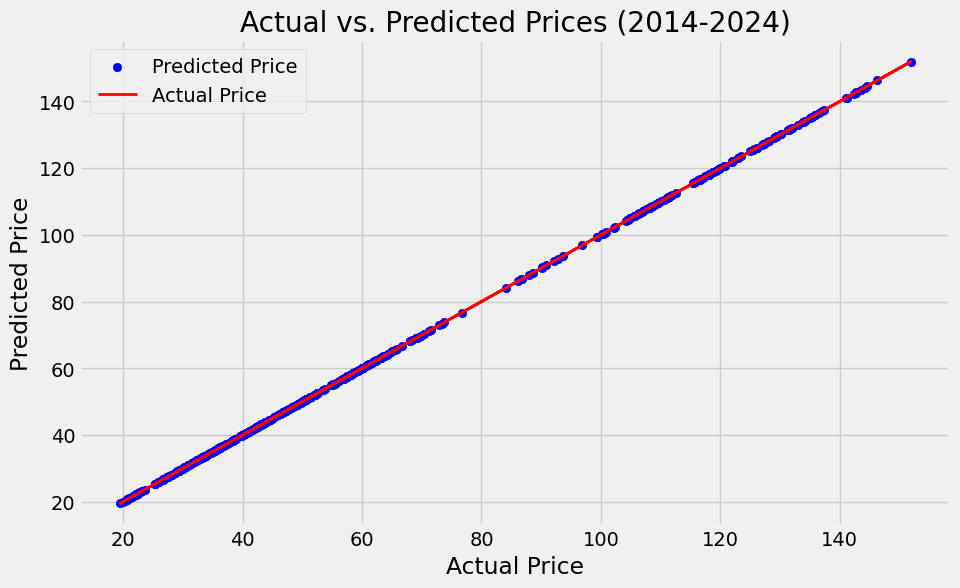

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', marker='o', label='Predicted Price')  # Add markers
plt.plot(y_test, y_test, color='red', linewidth=2, label='Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [74]:
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [75]:
predictions = elastic_net.predict(X_test)

In [76]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("R2 score:", r2)
print("Mean Squared Error:", mse)

R2 score: 0.9991681953386787
Mean Squared Error: 1.100366625513127


In [78]:
df.head()

,Price,Open,High,Low
Date,,,,
2024-03-22,151.50,148.05,152.75,148.60
2024-03-21,150.15,148.05,151.15,147.90
2024-03-20,145.70,149.70,150.70,143.85
2024-03-19,148.65,149.55,152.55,147.55
2024-03-18,149.60,143.85,150.25,142.20


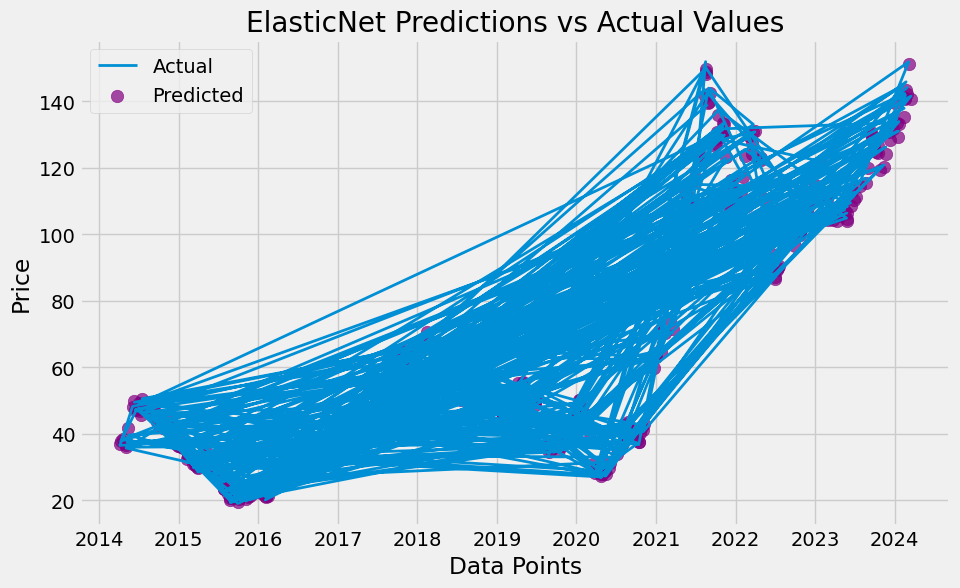

In [82]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for actual values
plt.plot(df['Actual'], label='Actual', linewidth=2)  # Adjust line width

# Scatter plot with circles for predictions
plt.scatter(df.index, predictions, label='Predicted', s=80, alpha=0.7, c='purple')  # Adjust marker size and color

# Customize the plot
plt.title('ElasticNet Predictions vs Actual Values')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()